# Tagged cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

$$\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)_{p_n>275 GeV/c}$$

last edit May-28 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data

In [28]:
load_SIDIS_data( Nruns = 101,  do_e_e_pi=False)

Run number  6420 (1/101 runs)
Loaded 77  (e,e'π+n) events
retained 38  events with Pn > 275 MeV/c
Loaded 13  (e,e'π-n) events
retained 12  events with Pn > 275 MeV/c
Run number  6421 (2/101 runs)
Loaded 56  (e,e'π+n) events
retained 38  events with Pn > 275 MeV/c
Loaded 23  (e,e'π-n) events
retained 17  events with Pn > 275 MeV/c
Run number  6422 (3/101 runs)
Loaded 81  (e,e'π+n) events
retained 65  events with Pn > 275 MeV/c
Loaded 29  (e,e'π-n) events
retained 20  events with Pn > 275 MeV/c
Run number  6426 (4/101 runs)
Loaded 32  (e,e'π+n) events
retained 19  events with Pn > 275 MeV/c
Loaded 14  (e,e'π-n) events
retained 10  events with Pn > 275 MeV/c
Run number  6428 (5/101 runs)
Loaded 61  (e,e'π+n) events
retained 40  events with Pn > 275 MeV/c
Loaded 26  (e,e'π-n) events
retained 19  events with Pn > 275 MeV/c
Run number  6429 (6/101 runs)
Loaded 77  (e,e'π+n) events
retained 57  events with Pn > 275 MeV/c
Loaded 18  (e,e'π-n) events
retained 14  events with Pn > 275 MeV/c
Run 

## (2) Apply selection cuts not previously imposed

In [29]:
_,e_e_pi_n_pass_cuts,_ = apply_further_selection_cuts_to_data(fdebug=2);

Applying selection cuts not previously imposed
(1) DATA
(e,e'πn)
Apply a π+/π- acceptance matching cut on the in p-theta plane
(e,e piplus )
3719 events before cut
95844 events after p-theta cut (2577.1 %)
(e,e piminus )
1013 events before cut
37771 events after p-theta cut (3728.6 %)
Done applying selection cuts not previously imposed


## (3) Extract cross-section ratio as a function of Bjorken $x$
For a moving proton $x'$, defined as
$ x' = Q^2/((W')^2 - m_N^2 + Q^2)$

In [30]:
z_bins   = [0.4,0.5,0.75]
z_widths = [0.1,0.1,0.15]
x_bins   = np.linspace(0.2,0.6,5)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
x_bins

array([0.2, 0.3, 0.4, 0.5, 0.6])

In [31]:
# var_label = "standing proton x"
var_label = "moving proton x"

if   var_label == "standing proton x":
    var    = 'xB'
    xlabel = "Bjorken $x$"
    
elif var_label == "moving proton x":
    var    = 'xPrime2'
    xlabel = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"    

In [32]:

Rpips2pims_n, Rpips2pims_n_errup, Rpips2pims_n_errdw = dict(), dict(), dict()
Y, dY = dict(),dict()
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width,z_bin+z_width
    (Rpips2pims_n[z_bin],
     Rpips2pims_n_errup[z_bin], 
     Rpips2pims_n_errdw[z_bin]) = compute_ratio_pips_to_pims(df_dict=e_e_pi_n  , 
                                                             var=var, 
                                                             bins=x_bins, 
                                                             z_min=z_min,z_max=z_max)

    # fit to a constant 
    y    = Rpips2pims_n[z_bin]
    y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
    p,cov = np.polyfit(x,y,deg=0,cov=True)
    Y[z_bin],dY[z_bin] = p[0],cov[0,0]

    # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
print('done') 

done


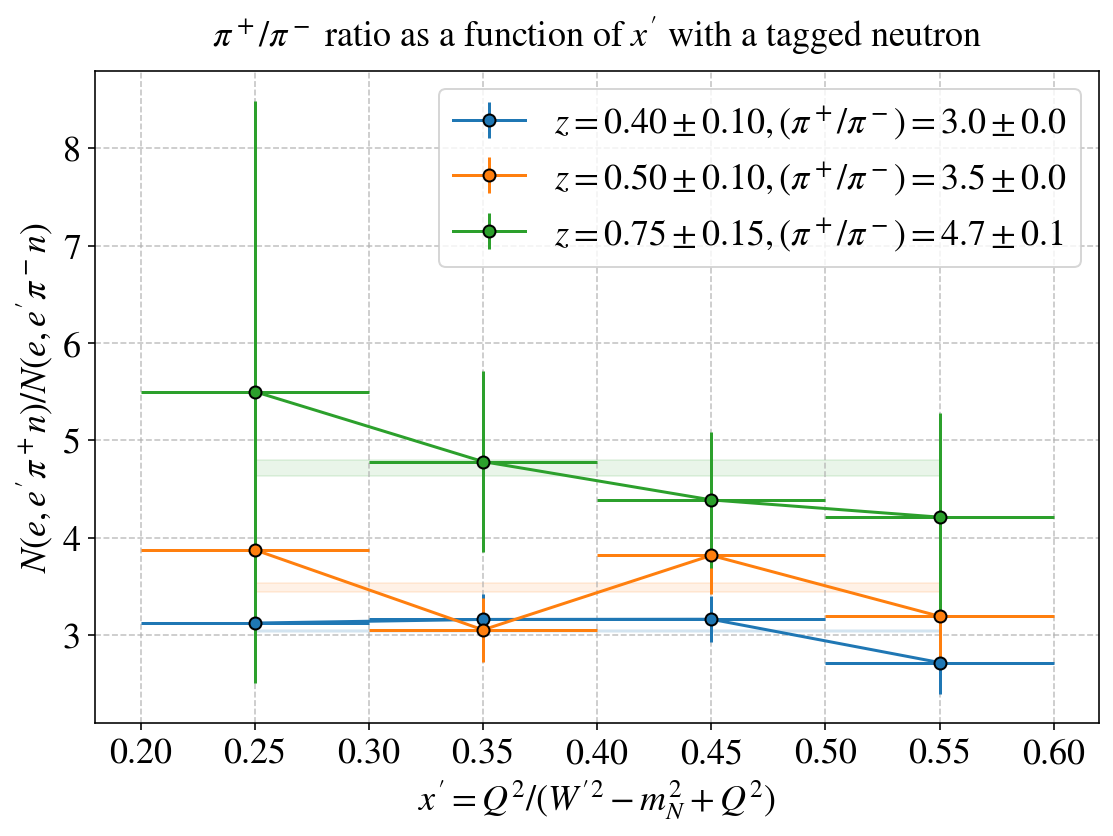

In [33]:
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
for z_bin,z_width in zip(z_bins,z_widths):
    y    = Rpips2pims_n[z_bin]
    y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
    x_fit = np.linspace(np.min(x),np.max(x),100)
    y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
    y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

    # plot
    l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f, (\pi^+/\pi^-)=%.1f\pm%.1f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
    ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
set_axes(ax,xlabel,"$N(e,e'\pi^+n)/N(e,e'\pi^-n)$",
         title="$\pi^+/\pi^-$ ratio as a function of $x'$ with a tagged neutron",
         do_add_grid=True, do_add_legend=True, fontsize=18,
        );

# (4) Save results to file

In [34]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/'
results_data_path = main_data_path + '/' + 'Results' + '/'
for z_bin,z_width in zip(z_bins,z_widths):
    y    = Rpips2pims_n[z_bin]
    y_err_up = Rpips2pims_n_errup[z_bin]
    y_err_dw = Rpips2pims_n_errdw[z_bin]
    df_to_save = pd.DataFrame({"$x'$":x,"$\Delta x'$":x_err,
                               '$R$':y,
                               '$\Delta R_{+}$':y_err_up,'$\Delta R_{-}$':y_err_dw})
    print('$z=%.2f\pm%.2f$'%(z_bin,z_width))
    filelabel = 'z_%.2f-%.2f'%(z_bin-z_width,z_bin+z_width)
    filename  =  results_data_path + 'Tagged_SIDIS_ratio_' + filelabel + '.csv'
    print(filename)
    
    display(df_to_save)
    df_to_save.to_csv(filename)
    print('saved',filename)
    # print(x)
    # print(x_err)
    # print(y)
    # print(y_err_up)
    # print(y_err_dw)

$z=0.40\pm0.10$
/Users/erezcohen/Desktop/data/BAND//Results/Tagged_SIDIS_ratio_z_0.30-0.50.csv


,$x'$,$\Delta x'$,$R$,$\Delta R_{+}$,$\Delta R_{-}$
0,0.25,0.05,3.122449,0.512539,0.512539
1,0.35,0.05,3.159794,0.260294,0.260294
2,0.45,0.05,3.161702,0.236626,0.236626
3,0.55,0.05,2.717172,0.319409,0.319409


saved /Users/erezcohen/Desktop/data/BAND//Results/Tagged_SIDIS_ratio_z_0.30-0.50.csv
$z=0.50\pm0.10$
/Users/erezcohen/Desktop/data/BAND//Results/Tagged_SIDIS_ratio_z_0.40-0.60.csv


,$x'$,$\Delta x'$,$R$,$\Delta R_{+}$,$\Delta R_{-}$
0,0.25,0.05,3.875000,0.887192,0.887192
1,0.35,0.05,3.052632,0.329423,0.329423
2,0.45,0.05,3.817391,0.399890,0.399890
3,0.55,0.05,3.192308,0.507314,0.507314


saved /Users/erezcohen/Desktop/data/BAND//Results/Tagged_SIDIS_ratio_z_0.40-0.60.csv
$z=0.75\pm0.15$
/Users/erezcohen/Desktop/data/BAND//Results/Tagged_SIDIS_ratio_z_0.60-0.90.csv


,$x'$,$\Delta x'$,$R$,$\Delta R_{+}$,$\Delta R_{-}$
0,0.25,0.05,5.500000,2.989565,2.989565
1,0.35,0.05,4.781250,0.929408,0.929408
2,0.45,0.05,4.387755,0.694588,0.694588
3,0.55,0.05,4.210526,1.074564,1.074564


saved /Users/erezcohen/Desktop/data/BAND//Results/Tagged_SIDIS_ratio_z_0.60-0.90.csv
